In [58]:
import pandas as pd
import matplotlib.pyplot as plt


TRADER_NAMES = ['Vinnie', 'Raj', 'Rhianna']

TRADER = 'Vinnie' #Set to one of the names above
PRODUCT = 'COCONUT' #Set to COCONUT or COCONUT_COUPON

# Read in trades data with names and create one big df
df1 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_1_wn.csv', sep=';')
df2 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_2_wn.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_3_wn.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
df = pd.concat([df1, df2, df3])
df = df.query('symbol==@PRODUCT')

# Read in prices data and create one big df
df1 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_1.csv', sep=';')
df2 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_2.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_3.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
prices = pd.concat([df1, df2, df3])
prices = prices.query('product==@PRODUCT')
print(f'Buyers of {PRODUCT} and number of trades: {df.buyer.value_counts()}')
print(f'Sellers of {PRODUCT} and number of trades: {df.seller.value_counts()}')

Buyers of COCONUT and number of trades: buyer
Vinnie     1578
Raj         210
Rhianna     181
Name: count, dtype: int64
Sellers of COCONUT and number of trades: seller
Vinnie     1551
Raj         221
Rhianna     197
Name: count, dtype: int64


In [59]:
df_trader = df.query('buyer==@TRADER or seller==@TRADER').copy()
df_trader['quantity'] = df_trader.apply(lambda x: x['quantity'] if x['buyer'] == TRADER else -x['quantity'], axis=1)
df_trader_1 = df_trader.query('timestamp < 1000000').copy()
df_trader_1['position'] = df_trader_1['quantity'].cumsum()
df_trader_2 = df_trader.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_trader_2['position'] = df_trader_2['quantity'].cumsum()
df_trader_3 = df_trader.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_trader_3['position'] = df_trader_3['quantity'].cumsum()
df_trader = pd.concat([df_trader_1, df_trader_2, df_trader_3])
df_trader = df_trader.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_trader['position'] = df_trader['position'].fillna(method='ffill')
df_trader['position'] = df_trader['position'].fillna(0)
print(f'Number of times sold to: {df_trader.query("seller==@TRADER").buyer.value_counts()}')
print(f'Number of times bought from: {df_trader.query("buyer==@TRADER").seller.value_counts()}')

Number of times sold to: buyer
Vinnie     1160
Raj         210
Rhianna     181
Name: count, dtype: int64
Number of times bought from: seller
Vinnie     1160
Raj         221
Rhianna     197
Name: count, dtype: int64


/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89075/1683967768.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trader['position'] = df_trader['position'].fillna(method='ffill')


In [60]:
# calculate profit for the trader
current_profit = 0
bought_items = []
sold_items = []
for row, index in df_trader.iterrows():
    if index['buyer'] == TRADER:
        current_profit -= index['price']
    else:
        current_profit += index['price']

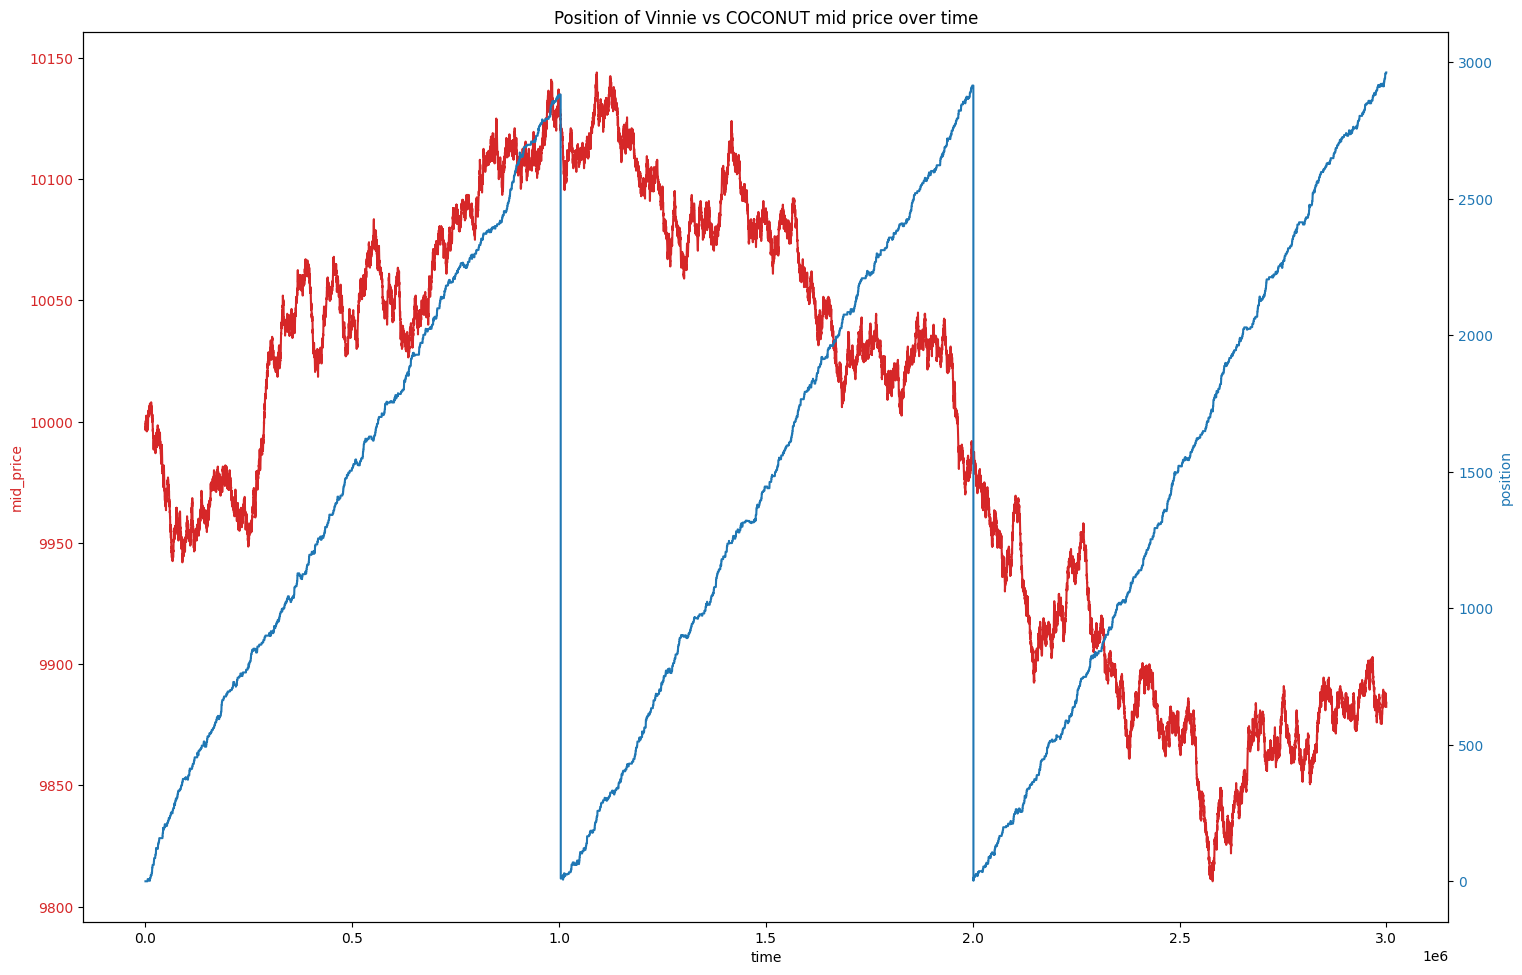

In [61]:
#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of {TRADER} vs {PRODUCT} mid price over time')
plt.show()

Largest trade of COCONUT by Vinnie: 10.0
Smallest trade of COCONUT by Vinnie: -10.0
Value counts of trades of COCONUT by Vinnie: quantity
 5.0     241
 9.0     240
 8.0     231
 7.0     231
 6.0     221
 10.0    216
 2.0      68
 1.0      65
 3.0      64
-1.0      61
-3.0      60
-2.0      60
-7.0      38
-9.0      38
-10.0     36
-8.0      35
-5.0      34
-6.0      29
 4.0       1
Name: count, dtype: int64


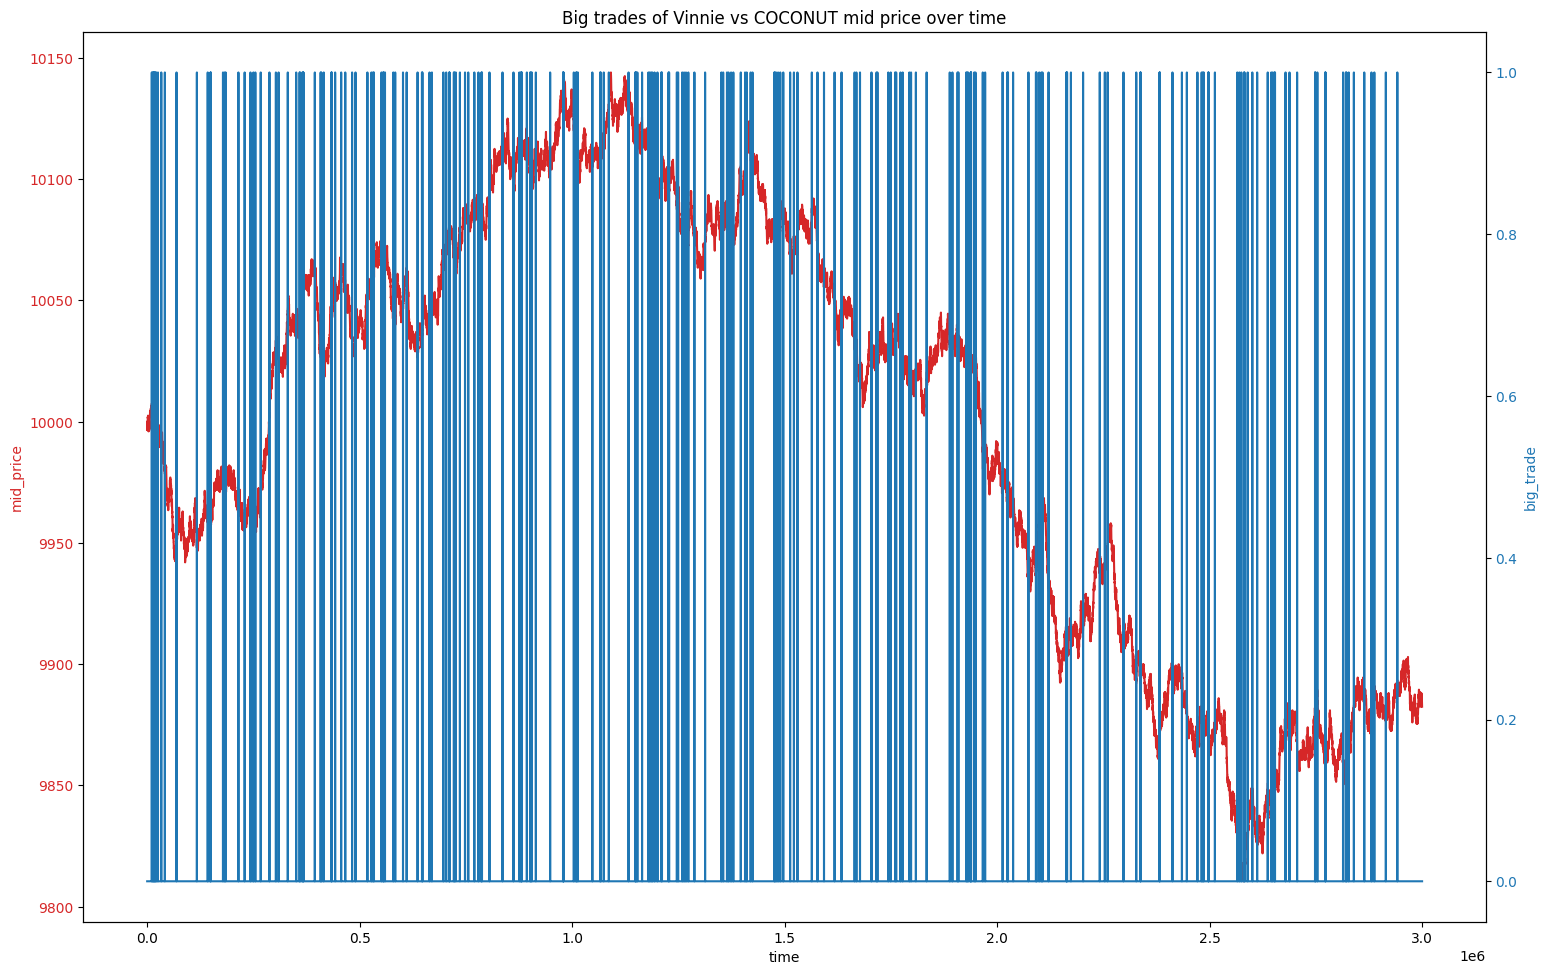

In [62]:
largest_trade = df_trader['quantity'].max()
smallest_trade = df_trader['quantity'].min()
print(f'Largest trade of {PRODUCT} by {TRADER}: {largest_trade}')
print(f'Smallest trade of {PRODUCT} by {TRADER}: {smallest_trade}')
print(f'Value counts of trades of {PRODUCT} by {TRADER}: {df_trader["quantity"].value_counts()}')

df_trader['big_trade'] = (df_trader['quantity'] == largest_trade) | (df_trader['quantity'] == smallest_trade)
df_trader['big_trade'] = df_trader['big_trade'].astype(int)
df_trader['big_trade'] = df_trader['big_trade'].fillna(0)

#plot big_trade and price over time wtih right y axis for big_trade
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('big_trade', color=color)
ax2.plot(df_trader['timestamp'], df_trader['big_trade'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Big trades of {TRADER} vs {PRODUCT} mid price over time')
plt.show()

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89075/3635338598.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rare['quantity'].fillna(0, inplace=True)
/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89075/3635338598.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rare['position'] = df_rare['position'].fillna(method='ffill')


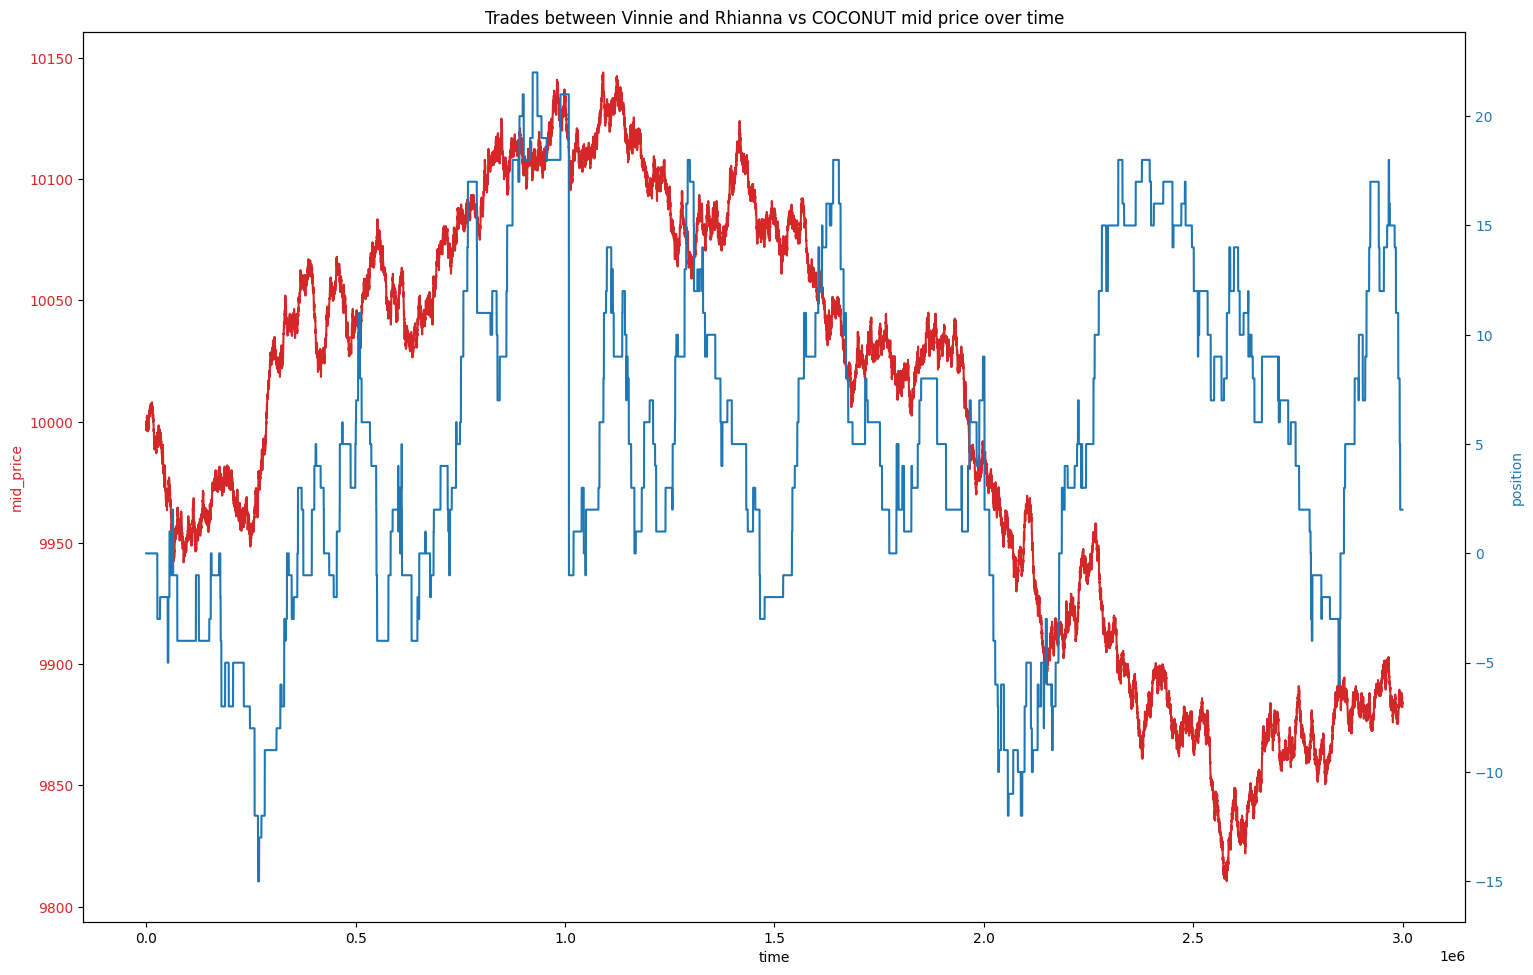

In [63]:
# check if rarely occuring trades are a signal (e.g. here trades between vladimir and Remy)
TRADER_NAMES = ['Vinnie', 'Raj', 'Rhianna']
TRADER2 = 'Rhianna'
df_rare = df.query(f'buyer==@TRADER and seller==@TRADER2 or buyer==@TRADER2 and seller==@TRADER').copy()
df_rare['quantity'] = df_rare.apply(lambda x: x['quantity'] if x['buyer'] == TRADER else -x['quantity'], axis=1)
df_rare_1 = df_rare.query('timestamp < 1000000').copy()
df_rare_1['position'] = df_rare_1['quantity'].cumsum()
df_rare_2 = df_rare.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_rare_2['position'] = df_rare_2['quantity'].cumsum()
df_rare_3 = df_rare.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_rare_3['position'] = df_rare_3['quantity'].cumsum()
df_rare = pd.concat([df_rare_1, df_rare_2, df_rare_3])
df_rare = df_rare.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_rare['quantity'].fillna(0, inplace=True)
df_rare['position'] = df_rare['position'].fillna(method='ffill')
df_rare['position'] = df_rare['position'].fillna(0)
#plot quantity and price over time wtih right y axis for quantity
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_rare['timestamp'], df_rare['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_rare['timestamp'], df_rare['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Trades between {TRADER} and {TRADER2} vs {PRODUCT} mid price over time')
plt.show()